In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df=pd.read_csv(r'/content/drive/MyDrive/Data sets/Medical Cost Personal Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Preprocessing Part

In [3]:
#Checking object data type with uninque value count
df.select_dtypes(include='object').nunique()

sex       2
smoker    2
region    4
dtype: int64

In [4]:
#Checking intger data type with uninque value count
df.select_dtypes(include=int).nunique()

age         47
children     6
dtype: int64

In [5]:
#Checking in data frame data type null value count and all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Deleting rows form data frame if null value available in any row
df.dropna(inplace=True)

In [7]:
#Data frame information in rows and columns
df.shape

(1338, 7)

In [8]:
#checking null values count in columns
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# checking statical information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Removing Outlier using percentile

In [10]:
#from scipy import stats

In [11]:
#quartile
q1,q3=np.percentile(df['bmi'],q=(25,75))

In [12]:
iqr=q3-q1
lx=q1-1.5*iqr
ux=q3+1.5*iqr

In [13]:
df=df.loc[(df['bmi']>=lx) & (df['bmi']<=ux)]

In [14]:
df.shape

(1329, 7)

#Correlation Heatmap

<ipython-input-15-3145246314e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt='.2g',annot=True)


<Axes: >

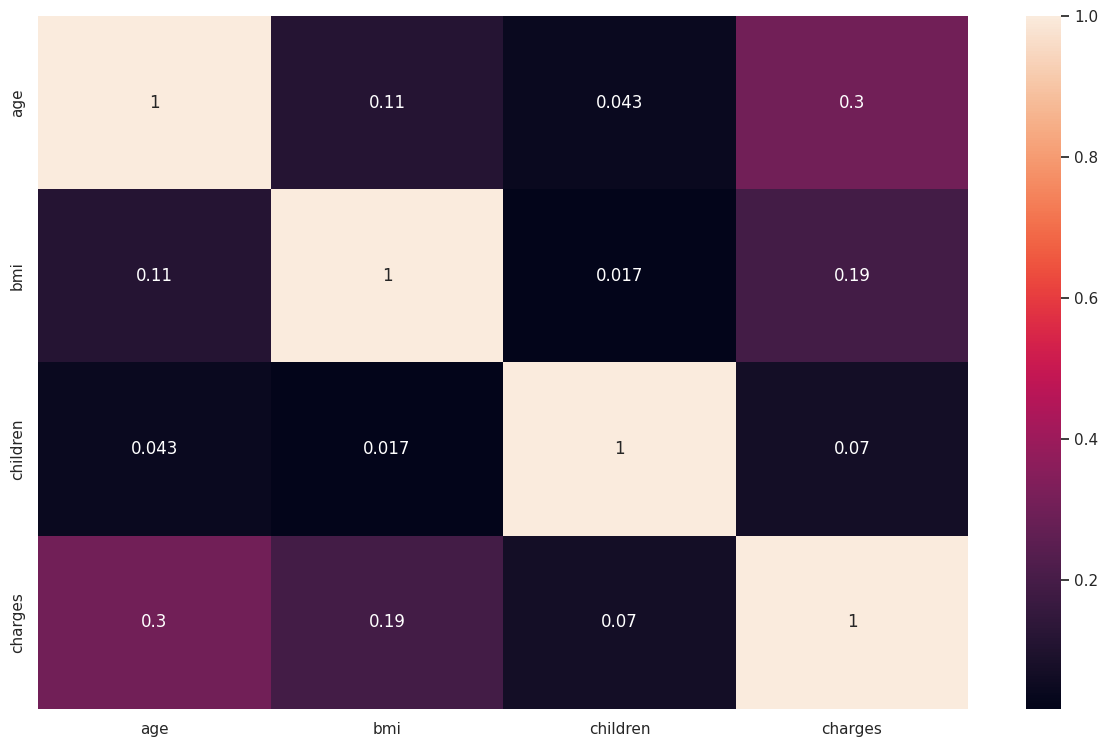

In [15]:
#Checking correlation by heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

#Exploratory data Analysis

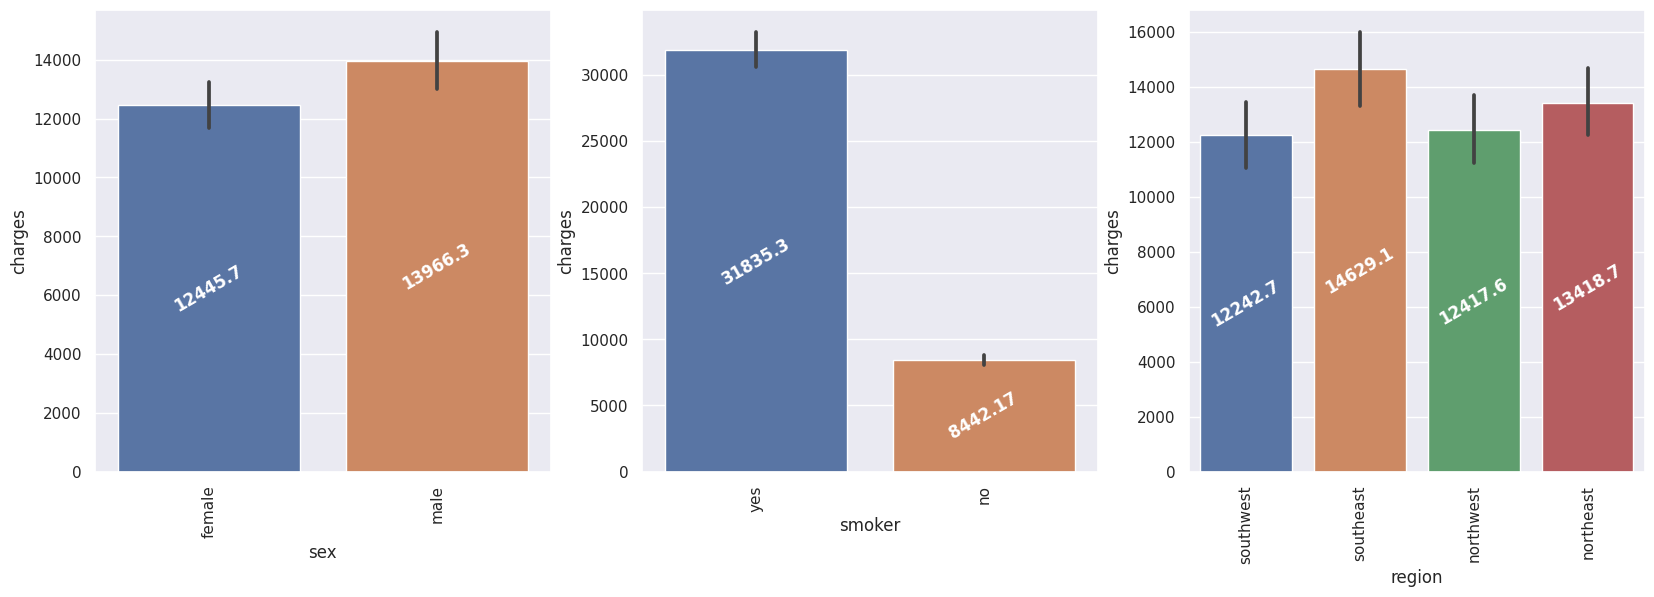

In [16]:
#list of categorical columns
cat_var=['sex', 'smoker', 'region']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create bar plot for each categorical column
for i,var in enumerate(cat_var):
  ax=sns.barplot(x=var,y='charges',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  for container in ax.containers:
        container.datavalues
        ax.bar_label(container,color='white',weight='bold',rotation=30,label_type='center')



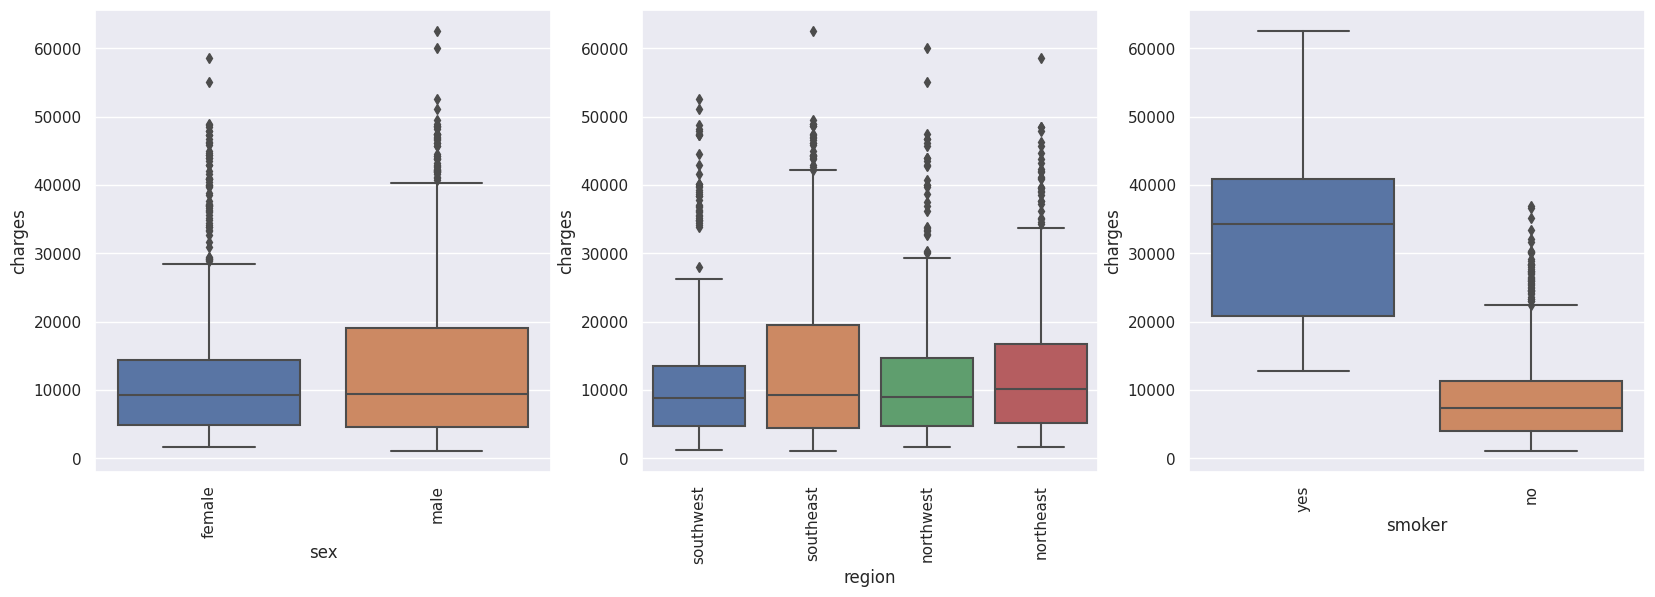

In [17]:
#list of categorical columns
cat_var=['sex', 'region', 'smoker']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create boxplot for each categorical column
for i,var in enumerate(cat_var):
  ax=sns.boxplot(x=var,y='charges',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

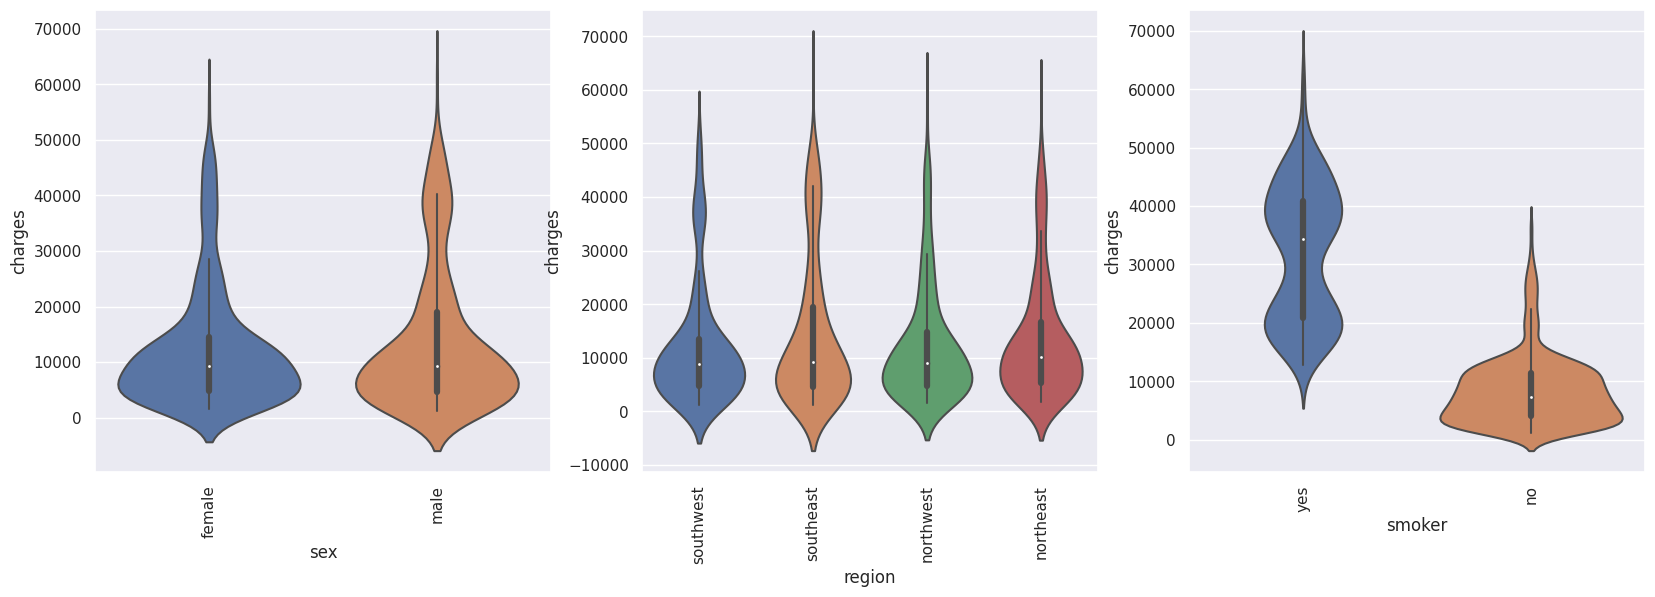

In [18]:
#list of categorical columns
cat_var=['sex', 'region', 'smoker']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create violinplot for each categorical column
for i,var in enumerate(cat_var):
  ax=sns.violinplot(x=var,y='charges',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

<ipython-input-19-6f54336a923b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-19-6f54336a923b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-19-6f54336a923b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)


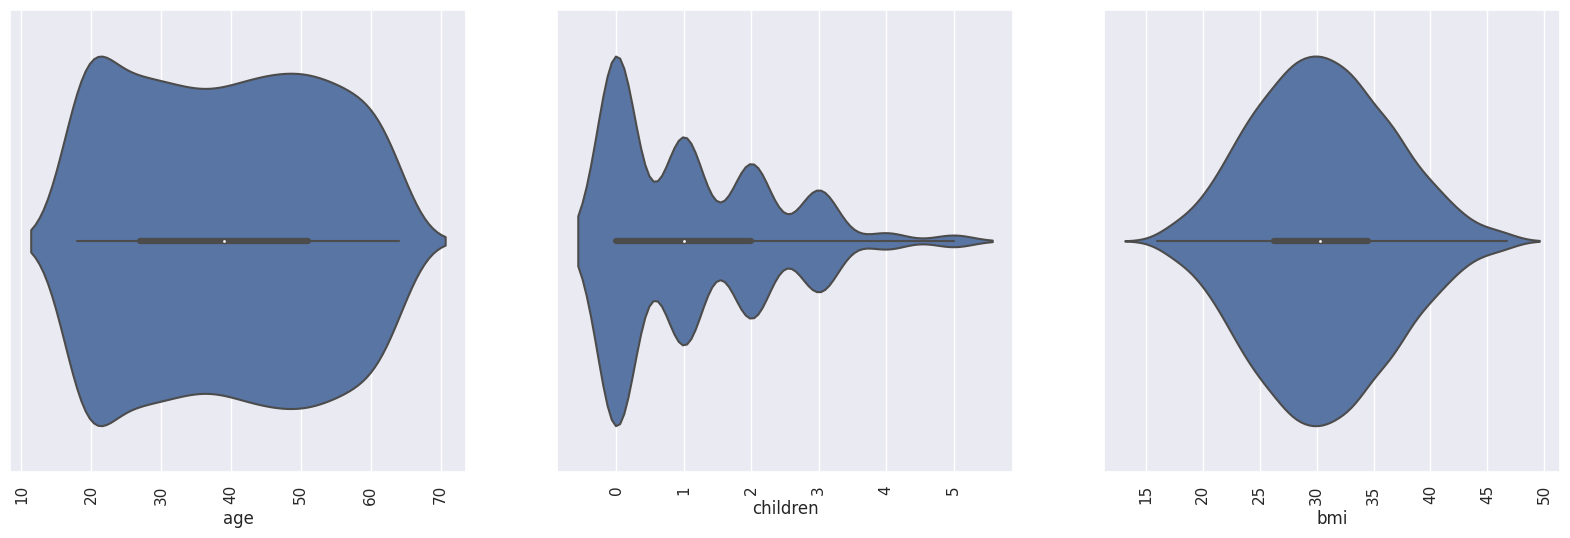

In [19]:
#list of categorical columns
cat_var=['age', 'children', 'bmi']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create violinplot for each categorical column
for i,var in enumerate(cat_var):
  ax=sns.violinplot(x=var,data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

<ipython-input-20-4192c10c3cab>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-20-4192c10c3cab>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-20-4192c10c3cab>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)


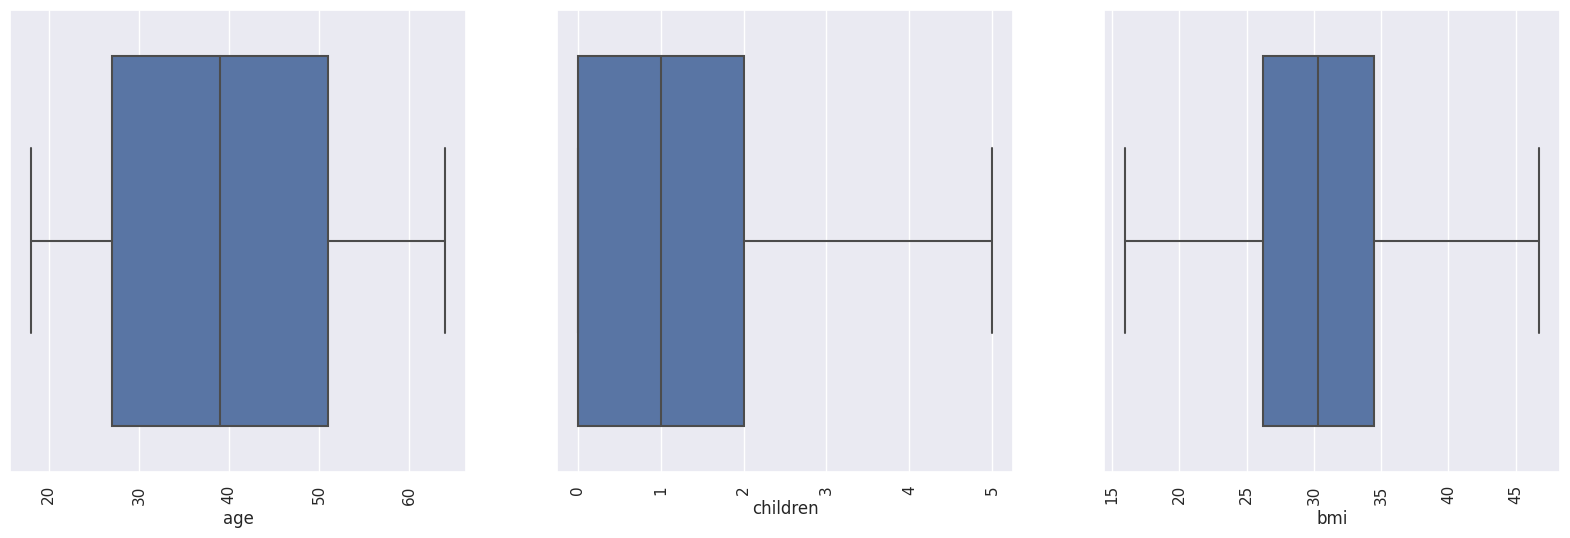

In [20]:
#list of categorical columns
cat_var=['age', 'children', 'bmi']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create boxplot for each categorical column
for i,var in enumerate(cat_var):
  ax=sns.boxplot(x=var,data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

<ipython-input-21-85c2648b42bd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-21-85c2648b42bd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-21-85c2648b42bd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)


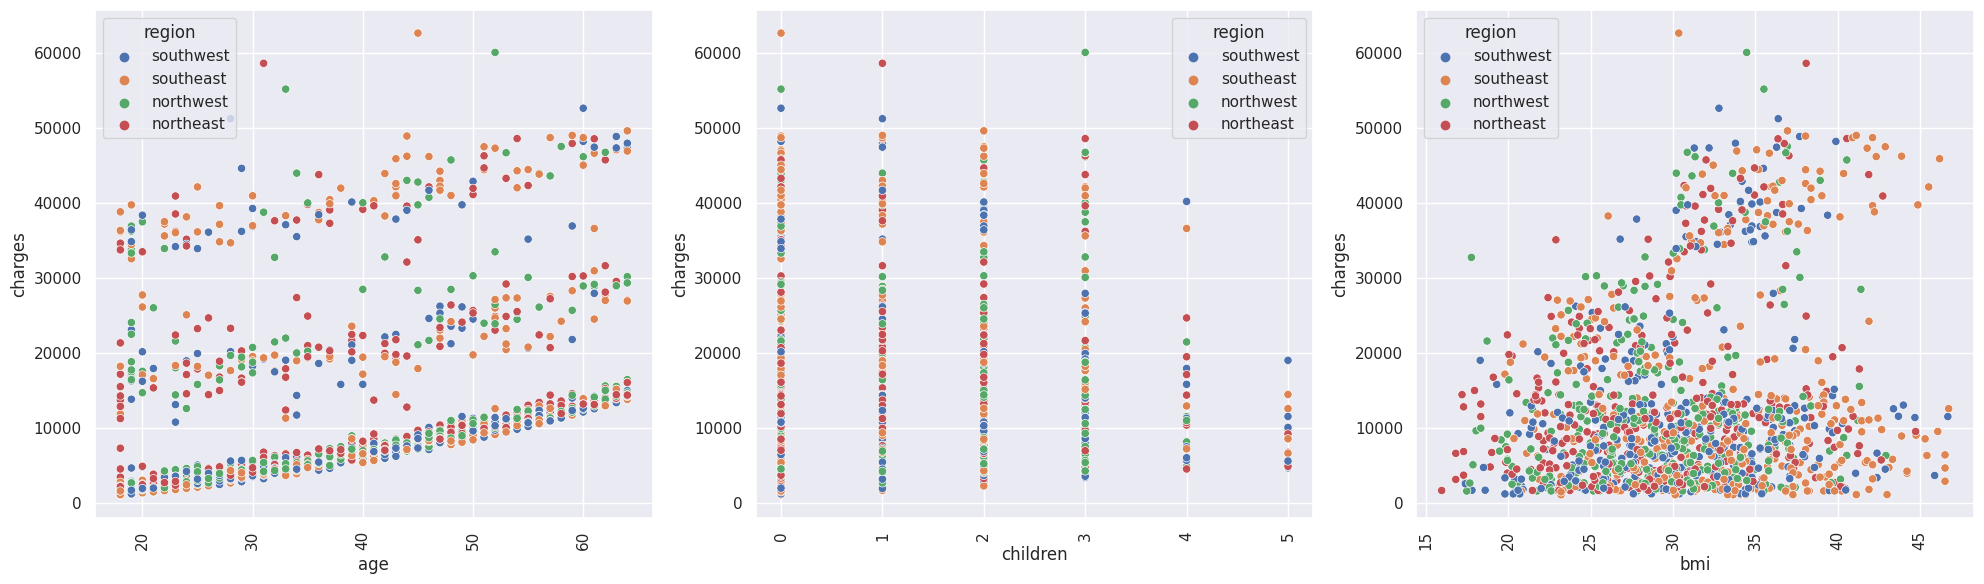

In [21]:
#list of categorical columns
cat_var=['age', 'children', 'bmi']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create scatterplot for each categorical column and region wise
for i,var in enumerate(cat_var):
  ax=sns.scatterplot(x=var,y='charges',hue='region',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()

<ipython-input-22-f003f089cfff>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-22-f003f089cfff>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-22-f003f089cfff>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-22-f003f089cfff>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-22-f003f089cfff>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-22-f003f089cfff>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabe

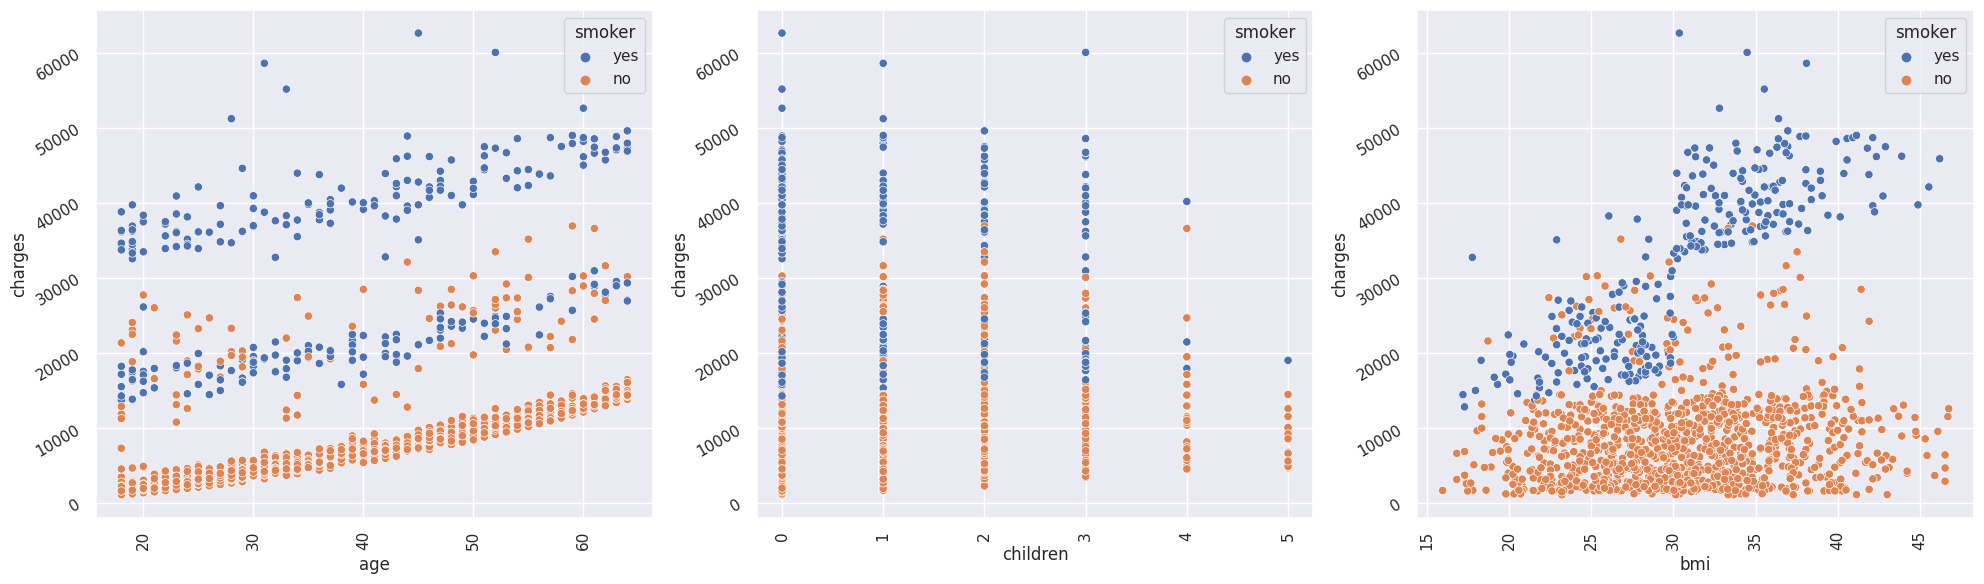

In [22]:
#list of categorical columns
cat_var=['age', 'children', 'bmi']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create boxplot for each categorical column snd smoker wise
for i,var in enumerate(cat_var):
  ax=sns.scatterplot(x=var,y='charges',hue='smoker',data=df,ax=axs[i])
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()

<ipython-input-23-7812beb2fa04>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-23-7812beb2fa04>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-23-7812beb2fa04>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-23-7812beb2fa04>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-23-7812beb2fa04>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-23-7812beb2fa04>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabe

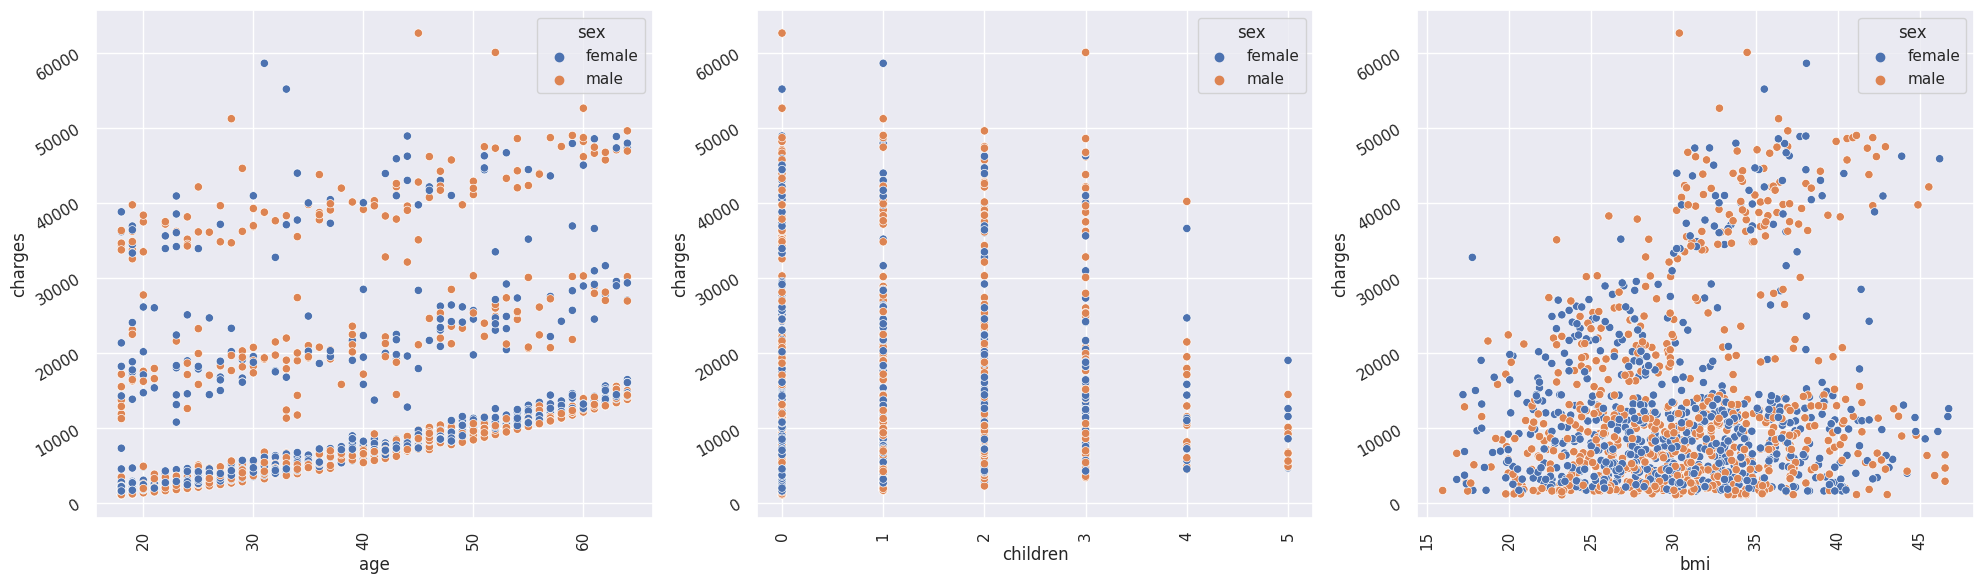

In [23]:
#list of categorical columns
cat_var=['age', 'children', 'bmi']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create boxplot for each categorical column and sex wise
for i,var in enumerate(cat_var):
  ax=sns.scatterplot(x=var,y='charges',hue='sex',data=df,ax=axs[i])
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()

In [24]:
bins_age=np.arange(0,df['age'].max()+10,10)
slot_age=['0- 10','10- 20','20- 30','30- 40','40- 50','50-60','60 and Above']
df['Age_Range']=pd.cut(df['age'],bins=bins_age,labels=slot_age)

In [25]:
bins_charges=np.arange(0,round(df['charges'].max())+10000,10000)
slot_charges=['0- 10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-And above']
df['Charges-Range']=pd.cut(df['charges'],bins=bins_charges,labels=slot_charges)

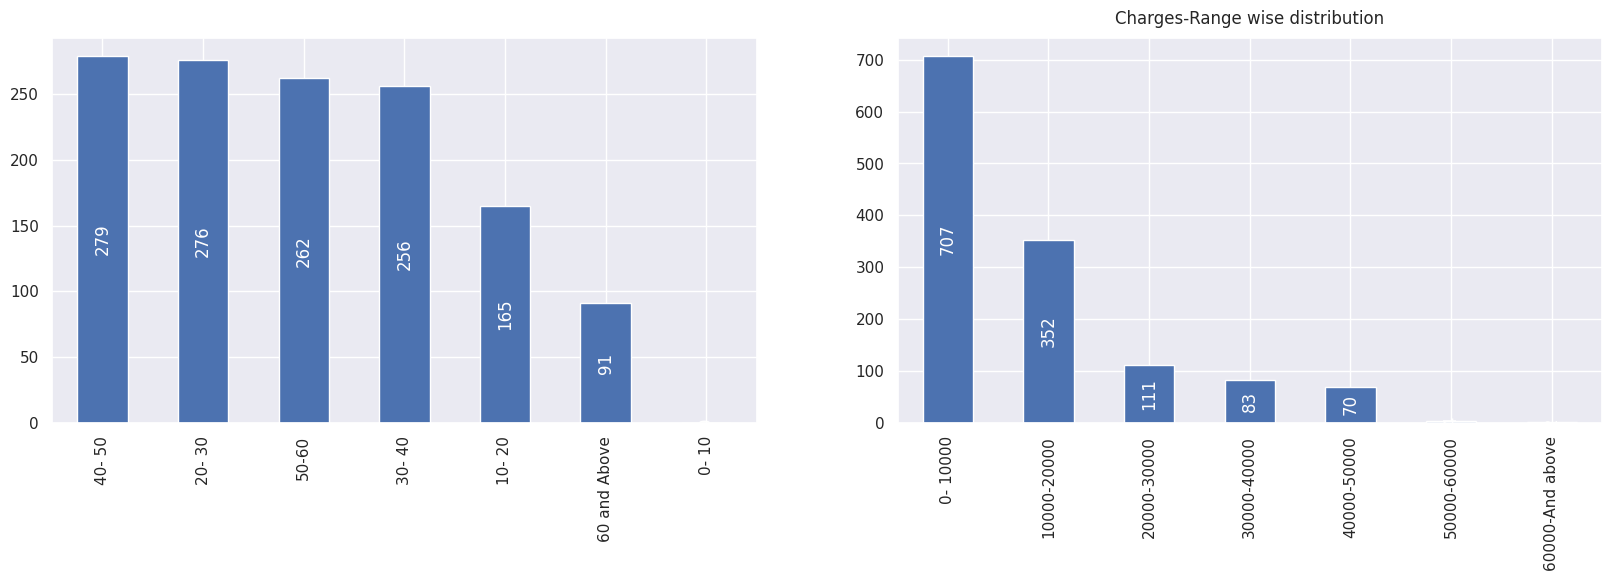

In [26]:
cat_var_b=['Age_Range', 'Charges-Range']
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axs=axs.flatten()
for i,var in enumerate(cat_var_b):
  plt.title(f"{var} wise distribution",loc='center',pad=10)
  ax=df[f'{var}'].value_counts().plot(kind='bar',ax=axs[i])
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center')

<ipython-input-27-5469d2e9957d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-27-5469d2e9957d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-27-5469d2e9957d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-27-5469d2e9957d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-27-5469d2e9957d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
<ipython-input-27-5469d2e9957d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabe

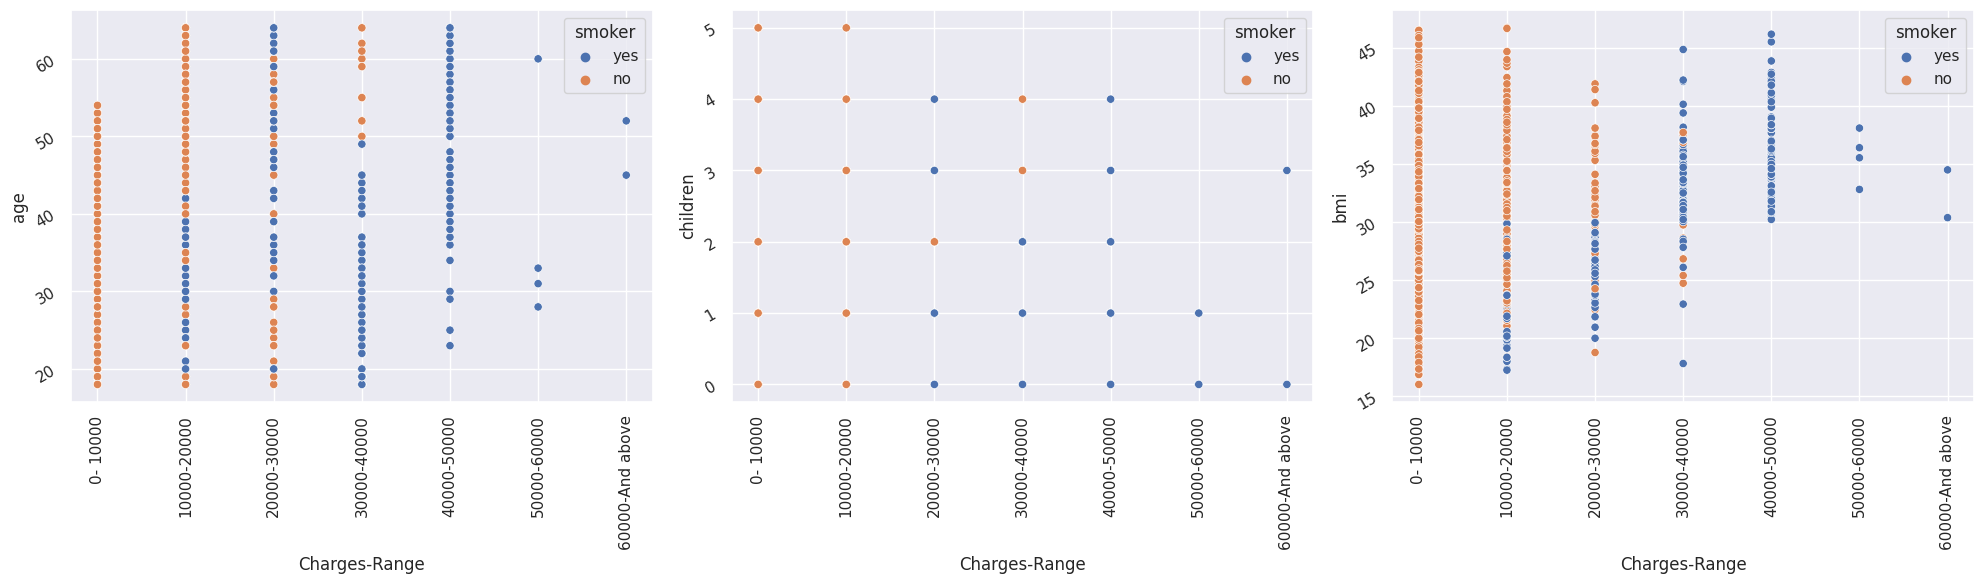

In [27]:
#list of categorical columns
cat_var=['age', 'children', 'bmi']
#Create figure with subplot
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(20,6))
axs=axs.flatten()
#Create boxplot for each categorical column snd smoker wise
for i,var in enumerate(cat_var):
  ax=sns.scatterplot(y=var,x='Charges-Range',hue='smoker',data=df,ax=axs[i])
  axs[i].set_yticklabels(axs[i].get_yticklabels(),rotation=30)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()